In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from urllib import unquote_plus
from scipy.spatial.distance import cosine,pdist
from itertools import combinations
import numpy as np
#sns.set(style='ticks', palette='Set2')


In [2]:
features = np.load('../GenreModeling/data/features/lda_artists/features_190.npy')
feature_dict = {i:row for i,row in enumerate(features)}
def calc_dist(idx_1,idx_2,metric='cosine'):
    if np.isnan(idx_1) or np.isnan(idx_2):
        return np.nan
    features1 = features[idx_1]
    features2 = features[idx_2]
    #if metric == 'JSD':
    #    return self.JSD(features1,features2)
    if metric == 'cosine':
        return cosine(features1,features2)
    elif metric == 'euclidean':
        return euclidean(features1,features2)

In [3]:
df = pd.read_pickle('../testData/scrobbles_processed/5759068.pkl').drop_duplicates()#.dropna(subset=['artist_idx'])
with open('../GenreModeling/data/vocab_idx') as fin:
    artist_dict = {}
    for line in fin:
        artist_name,idx = line.strip().split('\t')
        artist_dict[int(idx)] = unquote_plus(artist_name)
df['artist'] = df["artist_idx"].apply(lambda x: artist_dict.get(x))
df['features'] = df["artist_idx"].apply(lambda x: feature_dict.get(x,np.repeat(np.nan,features.shape[1])))
df.head()

,dist,artist_idx,ts,session,patch_idx_shuffle,block,patch_idx_simple,artist,features
0,NaN,50.0,2007-02-24 22:54:28,0,0,0,0,queens of the stone age,"[4.91829124712e-08, 9.83658249424e-07, 1.05153..."
1,0.986968,584.0,2007-02-24 22:59:07,0,0,1,1,lupe fiasco,"[0.00206053967627, 0.00718731389527, 5.2858440..."
2,0.765355,231.0,2007-02-24 23:01:54,0,0,2,2,black eyed peas,"[0.0252498142872, 0.00246156047485, 0.00116852..."
3,0.925810,747.0,2007-02-25 01:55:39,0,0,3,3,aesop rock,"[3.00600377109e-07, 3.57113248006e-05, 3.00600..."
4,0.830164,405.0,2007-02-25 02:00:36,0,0,4,4,at the drive-in,"[1.79202689245e-07, 0.017360152999, 1.79202689..."


In [4]:
df['listen'] = 1
piv = df.pivot(index='ts',columns='artist',values='listen').fillna(0)


In [14]:
piv.head()

artist,nan,"""weird al"" yankovic",...and you will know us by the trail of dead,10cc,12 stones,13th floor elevators,2 many dj's,3 leg torso,30 seconds to mars,311,...,Сергей Шнуров,Эдисон Васильевич Денисов,Արամ Խաչատրյան,坂本龍一,崔健,布袋寅泰,梅林茂,梶芽衣子,浜渦正志,菅野よう子
ts,,,,,,,,,,,,,,,,,,,,,
2007-02-24 22:54:28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-02-24 22:59:07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-02-24 23:01:54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-02-25 01:55:39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-02-25 02:00:36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
top_artists = df['artist'].value_counts()
top_artists[:10]

sigur rós                   2366
radiohead                   1750
the mars volta              1473
nine inch nails             1409
mogwai                      1217
nick cave & warren ellis    1159
beirut                      1112
tool                        1055
muse                         888
ratatat                      835
Name: artist, dtype: int64

In [18]:
monthly_totals = piv.sum(axis=1).resample('M').sum()
weekly_totals = piv.sum(axis=1).resample('W').sum()

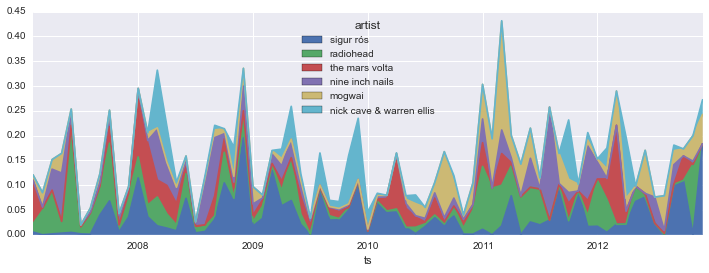

In [41]:
fig,ax = plt.subplots(1,1,figsize=(12,4))
#(piv[top_artists[:6].index].resample('M').sum() / monthly_totals)#.plot(ax=ax,kind='area')
#(piv[top_artists[:6].index].resample('W',how='sum') / weekly_totals).plot(ax=ax,kind='area')
# #(monthly_totals/monthly_totals.max()).plot(c='k',ls='--')
# #sns.despine()
# ax.grid()
piv[top_artists[:6].index].resample('M').sum().divide(monthly_totals,axis=0).plot(ax=ax,kind='area')
#ax.legend(bbox_to_anchor=(1.25,1))

/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


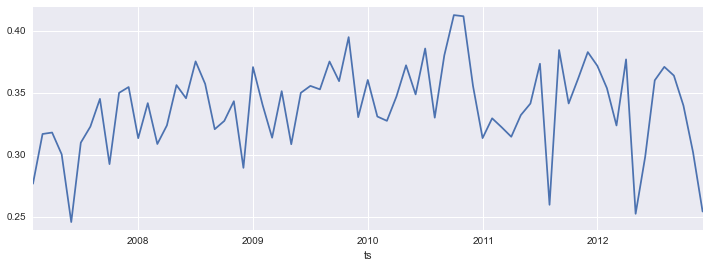

In [42]:
fig,ax = plt.subplots(1,1,figsize=(12,4))

def resampler(ser):
    #if len(ser==1)
    return np.nanmean(pdist([arr for arr in ser]))
    
#df.set_index("ts")['dist'].resample('M',how='mean').plot()
df.set_index("ts")['features'].resample('M',how=resampler).plot()

In [9]:
# fig,axes = plt.subplots(5,5,figsize=(8,3))
# for i,ax in enumerate(axes.flat):
#     piv[top_artists.index[i]].resample('M',how='sum').plot(ax=ax)
#     ax.set_xticks([])
#     ax.set_yticks([])
#     ax.set_ylim(0,200)
#     ax.set_xlabel('')

In [10]:
result = []
encountered = set()
for a in df['artist_idx']:
    if a not in encountered:
        result.append(1)
        encountered.add(a)
    else:
        result.append(0)
df['new'] = result

90      NaN
91      NaN
92      NaN
93      NaN
94      NaN
95      NaN
96      NaN
97      NaN
98      NaN
99     0.48
100    0.47
101    0.46
102    0.46
103    0.45
104    0.45
105    0.45
106    0.45
107    0.45
108    0.45
109    0.45
Name: new, dtype: float64

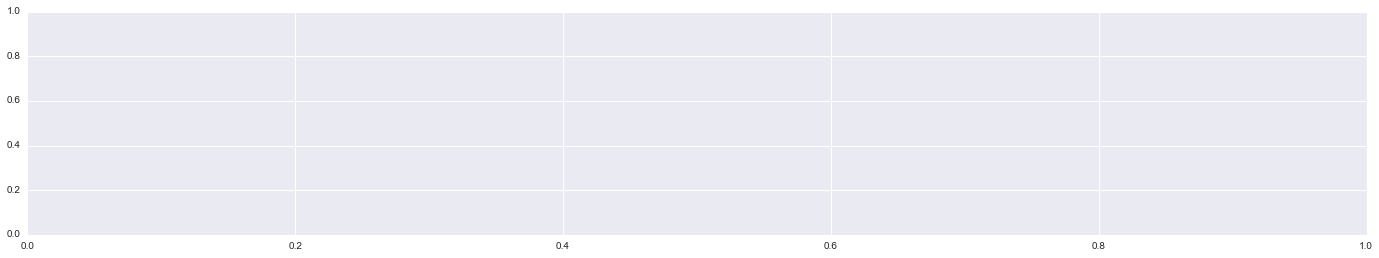

In [79]:
fig,ax = plt.subplots(figsize=(24,4))
df['new'].rolling(window=100).mean()[90:110]#.plot(ax=ax)


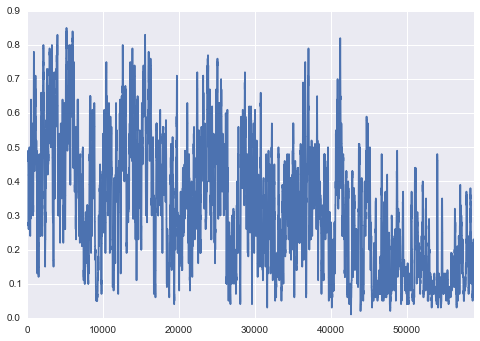

In [72]:
df['artist_idx'].fillna(0).rolling(window=100).aggregate(lambda x: len(set(x))/float(len(x))).plot()


In [80]:
df['artist_idx'].fillna(0).rolling(window=100).aggregate(lambda x: len(set(x))/float(len(x)))

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
         ... 
58803    0.23
58804    0.23
58805    0.23
58806    0.23
58807    0.23
58808    0.23
58809    0.23
58810    0.23
58811    0.22
58812    0.21
58813    0.20
58814    0.19
58815    0.18
58816    0.17
58817    0.16
58818    0.15
58819    0.14
58820    0.13
58821    0.12
58822    0.11
58823    0.11
58824    0.10
58825    0.10
58826    0.10
58827    0.10
58828    0.10
58829    0.10
58830    0.10
58831    0.09
58832    0.09
Name: artist_idx, dtype: float64

In [ ]:
def online_variance(data):
    n = np.zeros(5)
    mean = np.zeros(5,dtype=float)
    M2 = np.zeros(5,dtype=float)
     
    for x in data:
        mask = np.where(~np.isnan(x))
        n[mask]+=1
        delta = (x-mean)[mask]
        mean[mask] += delta/n[mask]
        M2[mask] += delta*(x-mean)[mask]
        
    return mean,np.sqrt(M2 / (n - 1))
    

online_variance(x)

In [ ]:
np.sqrt(online_variance(x))

In [ ]:
y=np.array([np.array([1,2,3,4,5]),np.array([2,3,4,5,np.nan]),np.array([np.nan,3,4,5,7])])
print np.nanmean(y,0)
np.sqrt(online_variance(y))

In [ ]:
np.nanstd(y,0)

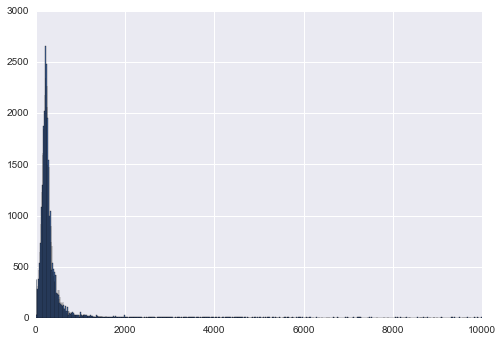

In [11]:
df['ts'].diff().dropna().apply(lambda x: x.seconds).hist(bins = np.arange(0,10000,10))